In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


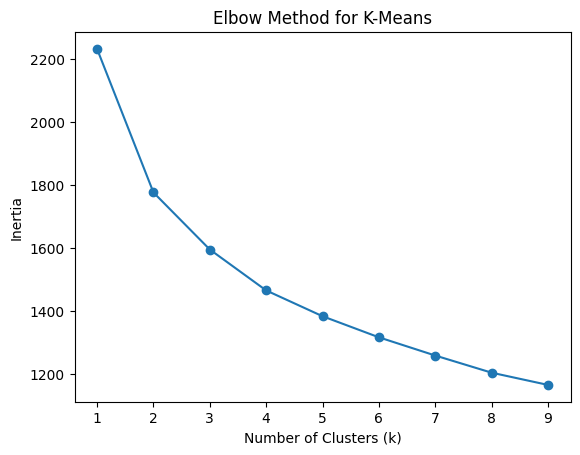


KMeans cluster counts:
 KMeans_cluster
0    156
1    141
Name: count, dtype: int64

Cross-tab with target:
 target            0    1
KMeans_cluster          
0               122   34
1                38  103


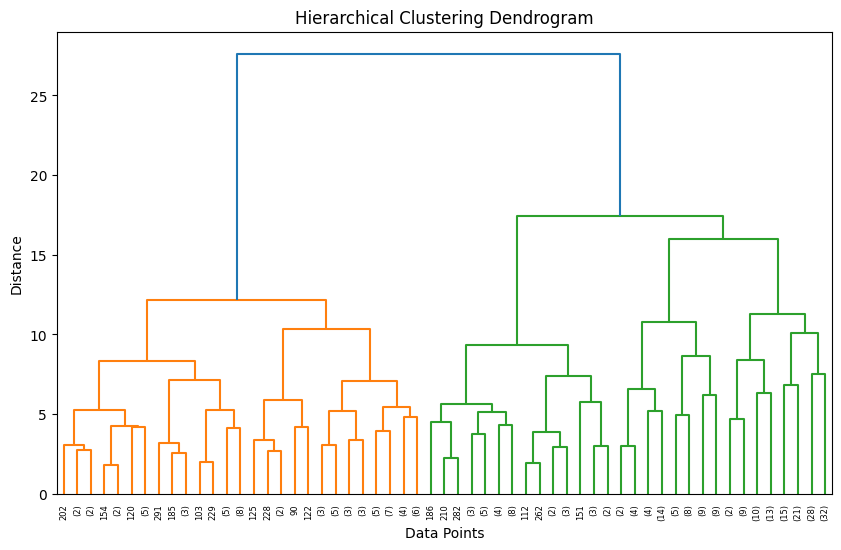


Hierarchical cluster counts:
 Hierarchical_cluster
0    221
1     76
Name: count, dtype: int64

Cross-tab with target:
 target                  0   1
Hierarchical_cluster         
0                     151  70
1                       9  67


In [2]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import pandas as pd
import matplotlib.pyplot as plt
# load reduced dataset (without target for clustering)
df = pd.read_csv("/content/drive/MyDrive/Heart_Disease_Project/data/heart_disease_selected.csv")
X = df.drop("target", axis=1)
y = df["target"]


# K-Means Clustering

# elbow method to find optimal K
inertia = []
K_range = range(1, 10)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X)
    inertia.append(km.inertia_)

plt.plot(K_range, inertia, marker="o")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for K-Means")
plt.show()

# choose k=2 (since we expect 2 classes: disease / no disease)
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
clusters_kmeans = kmeans.fit_predict(X)

# compare clusters with actual labels
df["KMeans_cluster"] = clusters_kmeans
print("\nKMeans cluster counts:\n", df["KMeans_cluster"].value_counts())
print("\nCross-tab with target:\n", pd.crosstab(df["KMeans_cluster"], y))


#  Hierarchical Clustering
plt.figure(figsize=(10, 6))
Z = linkage(X, method='ward')
dendrogram(Z, truncate_mode="level", p=5)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

# Agglomerative clustering with 2 clusters
hc = AgglomerativeClustering(n_clusters=2, linkage="ward")
clusters_hc = hc.fit_predict(X)
df["Hierarchical_cluster"] = clusters_hc

print("\nHierarchical cluster counts:\n", df["Hierarchical_cluster"].value_counts())
print("\nCross-tab with target:\n", pd.crosstab(df["Hierarchical_cluster"], y))
